In [45]:
import spektral
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import torch

In [46]:
spektral.datasets.graphsage.PPI() # download PPI dataset 

PPI(n_graphs=1)

In [47]:
from spektral.datasets.graphsage import PPI
dataset = PPI()

print(dataset) # number of graphs 

PPI(n_graphs=1)


In [48]:
graph = dataset[0]
print(f"Total nodes: {graph.x.shape[0]}")
print(f"Total node features: {graph.x.shape[1]}")
print(f"Number of labels per node: {graph.y.shape[1]}")
print(f"Adjacency matrix shape: {graph.a.shape}")

Total nodes: 56944
Total node features: 50
Number of labels per node: 121
Adjacency matrix shape: (56944, 56944)


Since the PPI data comes with a train-test-validation split on its own - Explore the distribution 

In [49]:
mask_tr = dataset.mask_tr
mask_va = dataset.mask_va 
mask_te = dataset.mask_te  

x_train = graph.x[mask_tr]
a_train = graph.a
y_train = graph.y[mask_tr]

x_val = graph.x[mask_va]
y_val = graph.y[mask_va]

x_test = graph.x[mask_te]
y_test = graph.y[mask_te]


print(f"Train set features: {x_train.shape}")
print(f"Val set features: {x_val.shape}")
print(f"Test set features: {x_test.shape}")


Train set features: (44906, 50)
Val set features: (6514, 50)
Test set features: (5524, 50)


## PPI Dataset Overview 

The PPI dataset contains a **single large graph** in this case - Split into a Train-Test-Validation Set 

### Training - Test - Validation Set
The training set have 44,906 nodes. Each node/protein is represented by a 50-dimensional feature vector. These features are gene sets, motif gene sets, etc
Each of the 44,906 nodes have 121 possible labels.


Similarly for the Validation and Test set 

### Explore the distribution of class labels 
Check for class imbalances

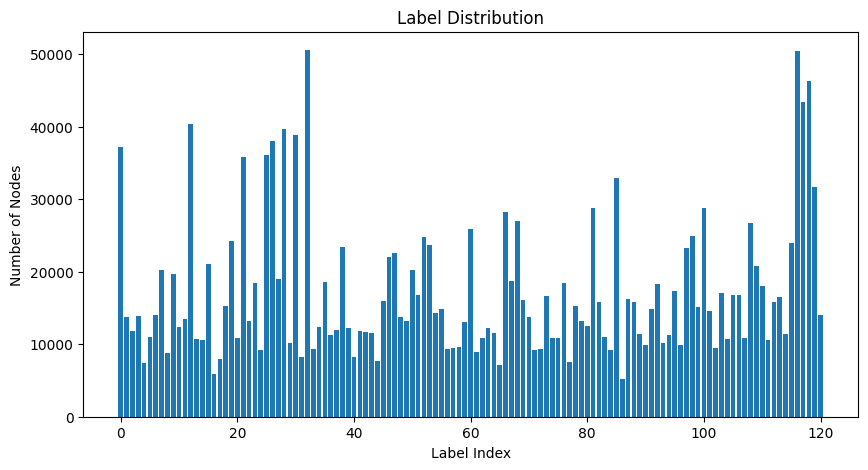

In [50]:
label_counts = np.sum(graph.y, axis=0)

plt.figure(figsize=(10, 5))
plt.bar(range(graph.y.shape[1]), label_counts)
plt.title('Label Distribution')
plt.xlabel('Label Index')
plt.ylabel('Number of Nodes')
plt.show()


### Checking for labal proportion of each class 

In [51]:
def check_class_proportion_ppi(labels):
    """Check the count and proportion of each label in the PPI dataset."""
    # Sum up the number of nodes with each label (column-wise sum)
    label_counts = np.sum(labels, axis=0)
    
    # Calculate the proportion of nodes for each label
    total_samples = labels.shape[0]
    label_proportions = label_counts / total_samples

    print("Label Counts and Proportions :")
    for i, (count, proportion) in enumerate(zip(label_counts, label_proportions)):
        print(f"Label {i}: {count} samples, {proportion:.4f} proportion")
    
    return label_counts, label_proportions

label_counts, label_proportions = check_class_proportion_ppi(graph.y)
check_class_proportion_ppi(graph.y)


Label Counts and Proportions :
Label 0: 37158.0 samples, 0.6525 proportion
Label 1: 13730.0 samples, 0.2411 proportion
Label 2: 11801.0 samples, 0.2072 proportion
Label 3: 13901.0 samples, 0.2441 proportion
Label 4: 7371.0 samples, 0.1294 proportion
Label 5: 11039.0 samples, 0.1939 proportion
Label 6: 14099.0 samples, 0.2476 proportion
Label 7: 20204.0 samples, 0.3548 proportion
Label 8: 8804.0 samples, 0.1546 proportion
Label 9: 19742.0 samples, 0.3467 proportion
Label 10: 12388.0 samples, 0.2175 proportion
Label 11: 13538.0 samples, 0.2377 proportion
Label 12: 40316.0 samples, 0.7080 proportion
Label 13: 10716.0 samples, 0.1882 proportion
Label 14: 10547.0 samples, 0.1852 proportion
Label 15: 21046.0 samples, 0.3696 proportion
Label 16: 5906.0 samples, 0.1037 proportion
Label 17: 8000.0 samples, 0.1405 proportion
Label 18: 15321.0 samples, 0.2691 proportion
Label 19: 24239.0 samples, 0.4257 proportion
Label 20: 10895.0 samples, 0.1913 proportion
Label 21: 35769.0 samples, 0.6281 prop

(array([37158., 13730., 11801., 13901.,  7371., 11039., 14099., 20204.,
         8804., 19742., 12388., 13538., 40316., 10716., 10547., 21046.,
         5906.,  8000., 15321., 24239., 10895., 35769., 13135., 18500.,
         9270., 36035., 38053., 19056., 39697., 10106., 38810.,  8207.,
        50578.,  9275., 12319., 18637., 11221., 11954., 23461., 12244.,
         8235., 11803., 11712., 11532.,  7627., 15968., 22082., 22517.,
        13758., 13211., 20229., 16782., 24731., 23715., 14335., 14850.,
         9352.,  9505.,  9638., 13116., 25852.,  8898., 10926., 12244.,
        11560.,  7077., 28272., 18775., 27051., 16131., 13758.,  9270.,
         9335., 16631., 10896., 10925., 18458.,  7599., 15267., 13224.,
        12511., 28757., 15871., 11028.,  9211., 32931.,  5249., 16214.,
        15855., 11376.,  9926., 14799., 18314., 10138., 11325., 17345.,
         9950., 23243., 24930., 15128., 28853., 14639.,  9457., 17114.,
        10674., 16857., 16752., 10909., 26734., 20728., 18080., 

In [52]:
def show_labels_for_first_n_nodes(graph, n=5):
    """Show the labels for the first n nodes in the PPI dataset."""
    labels = graph.y  
    for i in range(n):
        node_labels = np.where(labels[i] == 1)[0]  # Get indices of labels where the value is 1
        print(f"Node {i} has the following labels: {node_labels}")

show_labels_for_first_n_nodes(graph, n=5)


Node 0 has the following labels: [  0   9  12  17  19  21  25  26  28  30  31  32  41  47  53  54  61  65
  75  81  83  85  92  94  95  97  98 100 109 115 116 117 118 119]
Node 1 has the following labels: [  0   7   9  10  11  12  13  14  15  19  21  22  25  26  27  28  29  30
  32  34  35  38  39  41  42  45  46  47  49  50  51  52  53  54  55  56
  57  59  60  63  64  66  68  69  72  73  74  78  79  80  81  82  83  84
  85  87  88  90  91  92  93  94  95  96  97  98 100 101 103 104 105 106
 108 110 111 112 113 115 116 117 118 119 120]
Node 2 has the following labels: [  0   1   2  12  13  18  19  21  23  25  26  28  30  32  33  43  46  47
  48  52  58  60  62  66  70  76  81  85  95  97  99 105 116]
Node 3 has the following labels: [  0   9  10  15  19  21  28  30  32  34  35  37  38  39  45  46  47  49
  50  51  53  55  57  63  69  73  78  80  88  89  91  92  97  98 109 112
 114 115 116 117 118]
Node 4 has the following labels: [  0   7   8   9  10  11  12  13  15  19  21  22  23  2

### Calculating the sparsity of the matrix graph 

0.99995 = Very sparse graph where this is the amount of empty spaces (alot of 0s since the matrix is large, compared to the number of edges actually present)

In [53]:
adj_sparsity = 1 - (graph.a.count_nonzero() / (graph.a.shape[0] ** 2))

print(f"Adjacency matrix sparsity: {adj_sparsity:.4f}")


Adjacency matrix sparsity: 0.9995


### Calculating the distrubtion node degree per node 

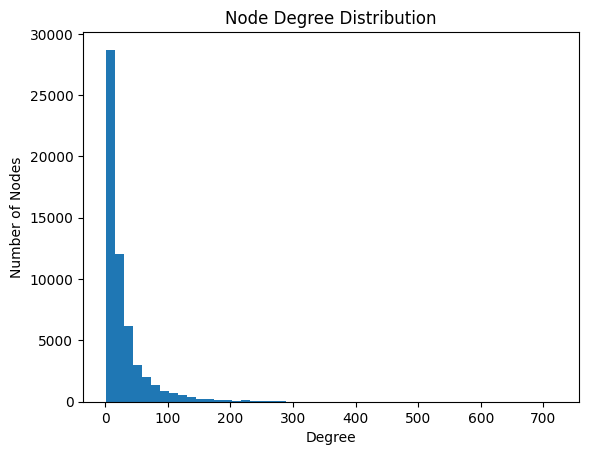

Average node degree: 28.31
Min node degree: 1.0
Max node degree: 721.0


In [54]:
node_degrees = np.array(graph.a.sum(axis=1)).flatten()

plt.hist(node_degrees, bins=50)
plt.title('Node Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

print(f"Average node degree: {np.mean(node_degrees):.2f}")
print(f"Min node degree: {np.min(node_degrees)}")
print(f"Max node degree: {np.max(node_degrees)}")


### Feature exploration 

In [55]:
def sample_ppi_content(graph, num_rows=5, num_features=10):
    """Sample rows from PPI dataset's node features."""
    feature_columns = [f'feature_{i}' for i in range(graph.x.shape[1])]
    sample_data = pd.DataFrame(graph.x[:num_rows, :num_features], columns=feature_columns[:num_features])
    print("Sample of node features:")
    print(sample_data)
    
sample_ppi_content(graph, num_rows=5, num_features=10)


Sample of node features:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   feature_6  feature_7  feature_8  feature_9  
0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0  


Notice alot of 0s, check if its an error or just a sparse matrix filled with 0s by counting unique values of each feature 

In [56]:
def check_non_zero_features(graph):
    non_zero_counts = np.count_nonzero(graph.x, axis=0)
    
    print("Non-zero counts per feature:")
    print(non_zero_counts)

check_non_zero_features(graph)


Non-zero counts per feature:
[ 417  432  717 1627  336  564  322  731  826  562    0 1602  106  701
  323  741  596  712 1142  535  426 1173  852  866  548  799  755  301
  246  424 1771 1164 1405 1387 1209 9002 1432 1335 1278 1087  933 1310
 1411 1324 1185 1160 1349 1076 1247 1233]


The proportion dont add up to one - Since a node can belong to **multiple labels at once**

### Visualization of Graph 

In [57]:
def create_ppi_graph(graph):
    """Create the PPI graph from the adjacency matrix."""
    G = nx.Graph()
    adj_matrix = graph.a.tocoo()  # Get sparse adjacency matrix in COO format
    edges = zip(adj_matrix.row, adj_matrix.col)  # Extract edges from row and col indices
    G.add_edges_from(edges)
    return G

def visualize_ppi_graph(G):
    """Visualize the PPI graph."""
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=10, node_color='blue', edge_color='gray', with_labels=False)
    plt.title("PPI Graph")
    plt.show()

def ppi_graph_statistics(G):
    """Print statistics of the PPI graph."""
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
    print(f"Average node degree: {avg_degree:.2f}")

In [59]:
ppi_graph = create_ppi_graph(graph)
print("Created Graph")

# visualize_ppi_graph(ppi_graph) # takes alot cpu power 
ppi_graph_statistics(ppi_graph)

Created Graph
Number of nodes: 56944
Number of edges: 818716
Average node degree: 28.76


While the matrix representation is sparse, the graph is still dense, as the number of edges >> nodes 

In [63]:
def export_nodes_and_features(graph, output_file="data/nodes.csv"):
    """Export nodes with features to a CSV file."""
    num_nodes = graph.x.shape[0]
    feature_columns = [f"feature_{i}" for i in range(graph.x.shape[1])]
    
    df_nodes = pd.DataFrame(graph.x, columns=feature_columns)
    df_nodes['node_id'] = np.arange(num_nodes)
    
    # Save to CSV
    df_nodes.to_csv(output_file, index=False)
    print(f"Nodes and features saved to {output_file}")

def export_edges(graph, output_file="data/edges.csv"):
    """Export edges to a CSV file."""
    # Get adjacency matrix in COO format to extract edges
    adj_matrix = graph.a.tocoo()  # Sparse matrix in COO format
    
    df_edges = pd.DataFrame({
        'source': adj_matrix.row,
        'target': adj_matrix.col
    })
    
    df_edges.to_csv(output_file, index=False)
    print(f"Edges saved to {output_file}")

def export_labels(graph, output_file="data/labels.csv"):
    """Export node labels to a CSV file."""
    num_nodes = graph.y.shape[0]
    label_columns = [f"label_{i}" for i in range(graph.y.shape[1])]
    
    df_labels = pd.DataFrame(graph.y, columns=label_columns)
    df_labels['node_id'] = np.arange(num_nodes)
    
    # Save to CSV
    df_labels.to_csv(output_file, index=False)
    print(f"Labels saved to {output_file}")

export_nodes_and_features(graph, "data/ppi_nodes.csv")
export_edges(graph, "data/ppi_edges.csv")
export_labels(graph, "data/ppi_labels.csv")


Nodes and features saved to data/ppi_nodes.csv
Edges saved to data/ppi_edges.csv
Labels saved to data/ppi_labels.csv
